## Using Logistics regression to predict whether a patient has 10years risk of future Coronary Heart Disease(CHD)

## ABSTRACT

This project has to do with logistic regression . Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used for prediction and also calculating the probability of success.

## Introduction
Classification techniques are an essential part of machine learning and data mining applications. Approximately 70% of problems in Data Science are classification problems. There are lots of classification problems that are available, but the logistics regression is common and is a useful regression method for solving the binary classification problem. Before using this model in my project, it is important the problem statement and business goal is well defined so that we have an idea of what our model should look like. Below is my problem statement and business goal for this project

## Problem statement

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression. Using logistics regression I eill be able to determine whether a person run the risk of having a heart disease. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

## Business Goal
I am required to use linear regression to predict whether a patient has 10years risk of future coronary heart disease(CHD) or not.I will make use of Binary Logistic Regression in which  target variable has only two possible outcomes such as heart disease or no heart disease.Hospitals and Doctors may use this model to predict which patients is at risk. Such patients will be required  to live a healthy lifestyle and improve on their diet. This will help reduce the complications and death rate 

## Motivation
World Health Organisation estimated that 12million deaths occur worldwide , every year due to Heart diseases. 12milion deaths each year is a very large number and there's a need to reduce this number. Developing a classification model such that one will be able to determine who run a risk of a heart disease, this way people can take precautions and live healthily 

## Proposed method
I will be using logistics regression. Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. 

## Data Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes

## Experiment 
I used python to model this  project with each step explained

In [1]:
#libraries 

In [1]:
import pandas as pd # for manipulating data
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
import requests # for loading data from an online resource
from io import StringIO # for reading inputs
import numpy as np

## Reading and understanding the data

Let's start with the following steps:

Importing data using the pandas library

Understanding the structure of the data

In [2]:
#loading my data
#my dataset is in a .csv file type. Pandas variable pd is used to access the dataset with read_csv() function.

In [3]:
framingham = pd.read_csv("framingham.csv")

In [4]:
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#columns
framingham.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
#Inspecting the various aspects of my data frame

In [5]:
framingham.shape # It gives me the total number of rows and columns my dataset is made up of

(4240, 16)

In [7]:
# my data set has 4240 rows and 16 columns

In [6]:
#Generate various summary statistics, excluding NaN values.
framingham.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
#Getting a concise summary of the dataframe
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
# Checking for missing (null) values
framingham.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
#Counting the missing values and dropping them
count=0
for i in framingham.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(framingham.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')


Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


In [10]:
#replacing the missing education values witht the most frequent value
framingham['education'].replace(np.nan, 1.0, inplace= True)

In [11]:
#replacing all other values with either the mean or mode of the coulumn values
framingham['BPMeds'].replace(np.nan, 0.0, inplace= True)
framingham['totChol'].replace(np.nan, framingham['totChol'].mean(), inplace= True)
framingham['glucose'].replace(np.nan, framingham['glucose'].mean(), inplace= True)
framingham['cigsPerDay'].replace(np.nan, framingham['cigsPerDay'].mean(), inplace= True)
framingham['BMI'].replace(np.nan, framingham['BMI'].mean(), inplace= True)
framingham['heartRate'].replace(np.nan, framingham['heartRate'].mean(), inplace= True)

In [13]:
#checking null values again
framingham.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
str(framingham)

'      male  age  education  currentSmoker  cigsPerDay  BPMeds  \\\n0        1   39        4.0              0         0.0     0.0   \n1        0   46        2.0              0         0.0     0.0   \n2        1   48        1.0              1        20.0     0.0   \n3        0   61        3.0              1        30.0     0.0   \n4        0   46        3.0              1        23.0     0.0   \n...    ...  ...        ...            ...         ...     ...   \n4235     0   48        2.0              1        20.0     0.0   \n4236     0   44        1.0              1        15.0     0.0   \n4237     0   52        2.0              0         0.0     0.0   \n4238     1   40        3.0              0         0.0     0.0   \n4239     0   39        3.0              1        30.0     0.0   \n\n      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \\\n0                   0             0         0    195.0  106.0   70.0  26.97   \n1                   0             0        

## Data visualization

This inolves understanding my datasets by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

<Figure size 432x864 with 0 Axes>

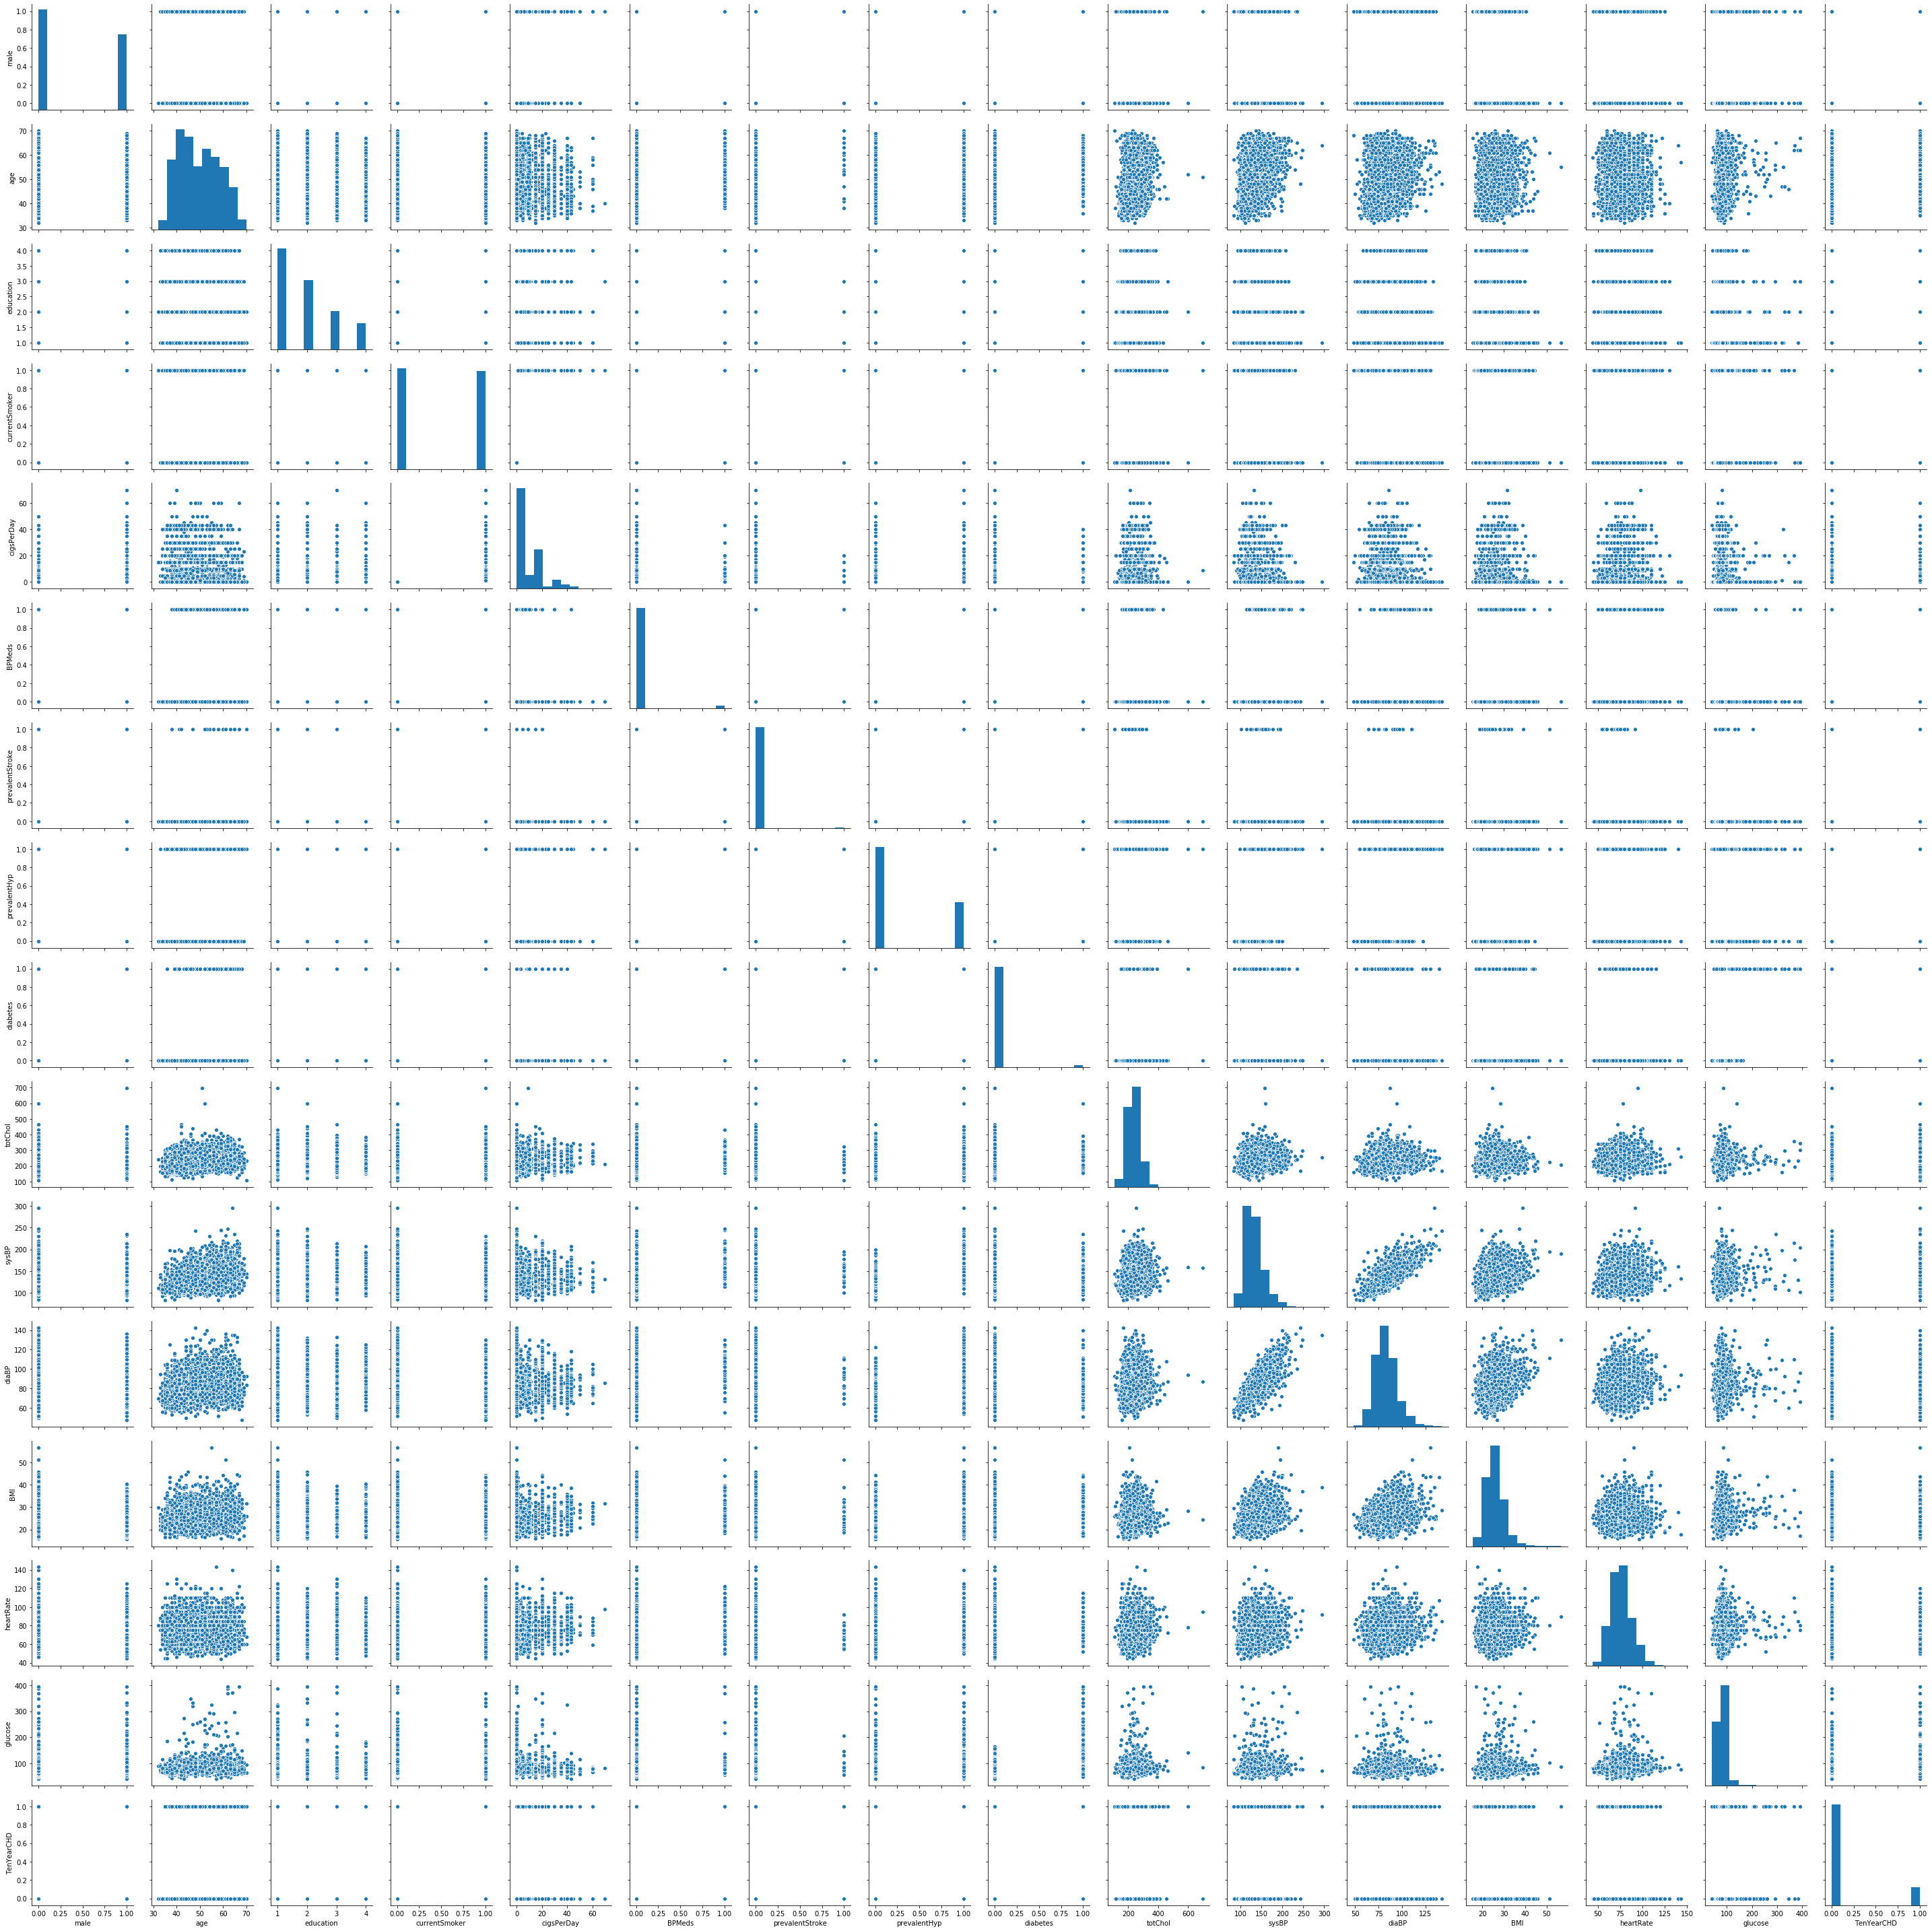

In [15]:
#Visualising all numeric variable
plt.figure(figsize=(6,12))
sns.pairplot(framingham) # A pairs plot allows us to see both distribution of single variables and relationships between two
plt.show()

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables

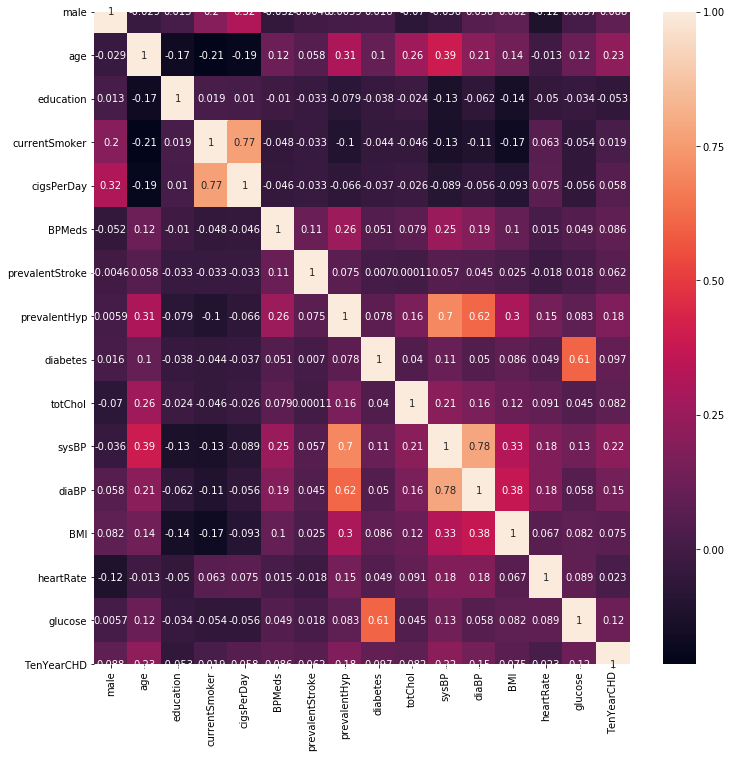

In [16]:
#Find correlation
plt.figure(figsize=(12, 12))
sns.heatmap(framingham.corr(),annot=True)

we can tell that there is strong relation between some of our features (cigsPerDay & currentSmoker) and (PrevalentHyp&sysBHP)

we can tell that there is strong relation between some of our features (cigsPerDay & currentSmoker) and (PrevalentHyp&sysBHP)

In [20]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

In [58]:
#let's split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=1)

In [59]:
#now we're going to try and use Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.001, solver='liblinear')
LR.fit(x_train, y_train)
LR.score(x_test, y_test) #good model accuracy with almost 87%

0.8415300546448088

## Logistics regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

## Splitting my data into training and testing model
I will be using a couple of libraries: sklearn.model_selection to split the training and testing dataset
I will split my datat such that 80% will be the training data while 20% will be the testing data

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)
framingham_train,framingham_test = train_test_split(framingham, train_size=0.80, test_size=0.20,random_state=100)
print(framingham_train.head())
print(framingham_test.head())

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
2934     1   41        1.0              1        20.0     0.0   
1999     0   40        2.0              0         0.0     0.0   
2727     0   48        2.0              1        20.0     0.0   
3935     0   46        1.0              0         0.0     0.0   
2664     1   42        2.0              1        20.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
2934                0             0         0    163.0  102.0   59.5  22.27   
1999                0             0         0    195.0  132.0   81.0  24.26   
2727                0             0         0    182.0  121.0   72.0  26.39   
3935                0             0         0    212.0  118.0   79.0  26.83   
2664                0             0         0    272.0  125.5   80.5  25.35   

      heartRate    glucose  TenYearCHD  
2934       67.0  82.000000           0  
1999       80.0  86.000000           0  
2727       

## Splitting the independent features from the target feature
Its very important we split the independent features from the target

In [22]:
#Dividing X and y sets for model building
y_train = framingham_train.pop('TenYearCHD')
X_train = framingham_train
y_test = framingham_test.pop('TenYearCHD')
X_test = framingham_test


In [23]:
X_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2934,1,41,1.0,1,20.0,0.0,0,0,0,163.0,102.0,59.5,22.27,67.0,82.000000
1999,0,40,2.0,0,0.0,0.0,0,0,0,195.0,132.0,81.0,24.26,80.0,86.000000
2727,0,48,2.0,1,20.0,0.0,0,0,0,182.0,121.0,72.0,26.39,76.0,81.963655
3935,0,46,1.0,0,0.0,0.0,0,0,0,212.0,118.0,79.0,26.83,70.0,72.000000
2664,1,42,2.0,1,20.0,0.0,0,0,0,272.0,125.5,80.5,25.35,66.0,71.000000


In [24]:
y_train.head()

2934    0
1999    0
2727    0
3935    0
2664    0
Name: TenYearCHD, dtype: int64

In [25]:
X_test.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
25,1,47,4.0,1,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0
3575,1,56,2.0,1,20.0,0.0,0,0,0,186.0,116.0,67.0,24.62,70.0,83.0
2716,1,62,4.0,0,0.0,0.0,0,1,0,240.0,152.0,95.0,25.37,63.0,70.0
2411,0,51,2.0,1,10.0,0.0,0,0,0,255.0,102.5,64.5,24.14,65.0,71.0
774,0,54,2.0,0,0.0,0.0,0,0,0,193.0,118.0,84.0,24.90,70.0,82.0


In [26]:
y_test.head()

25      1
3575    0
2716    1
2411    0
774     0
Name: TenYearCHD, dtype: int64

## Model Development and Prediction
First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [28]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\cliff_sowjzp2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [30]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[723,   5],
       [113,   7]], dtype=int64)

The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 723 and 7 are actual predictions, and 113 and 5 are incorrect predictions.

## Visualizing Confusion Matrix using Heatmap
I will visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

Text(0.5, 257.44, 'Predicted label')

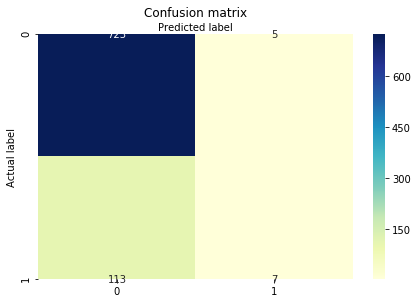

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
#Confusion Matrix Evaluation Metrics
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8608490566037735
Precision: 0.5833333333333334
Recall: 0.058333333333333334


## My accuracy rate is above 86%, considered as good accuracy

## ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

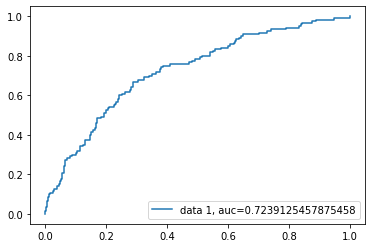

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## AUC score for this case is 0.72. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.


## Advantage of logistic regression
Because of its efficient and straightforward nature, it doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

## Limitations
Non linear problems can't be solved with logistic regression since it has a linear decision surface.

It is vulnerable to overfitting



## Later work
I will be working with a dataset that requires me to use Multinomial Logistic Regression in which The target variable has three or more nominal categories such as predicting the type of Wine or Ordinal Logistic Regression in which the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

## Conclusions
My model has adequately addressed the problem statement and helped us understand how logistic regression can be used to predict heart diseases.



## References

Navlani, A. (2019, December 16). Understanding logistics regression in python. Retrieved from https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

Gareth James, D. W. (n.d.). An introduction to statistical learning. Retrieved from https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf

Geron, A. (2019). Hands on machine learning with Scikit-learning, keras, and tensorflow. O'Reilly media, Inc.



